<a href="https://colab.research.google.com/github/PoonamS25/Video-Semantic-Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount to google drive
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 000000000001.jpg   000000286602.jpg
 000000000057.jpg   000000286630.jpg
 000000000106.jpg   000000286676.jpg
 000000000108.jpg   000000286721.jpg
 000000000188.jpg   000000286744.jpg
 000000000212.jpg   000000286776.jpg
 000000000408.jpg   000000286790.jpg
 000000000509.jpg   000000286843.jpg
 000000000535.jpg   000000286880.jpg
 000000000647.jpg   000000286922.jpg
 000000000686.jpg   000000286965.jpg
 000000000725.jpg   000000287055.jpg
 000000000809.jpg   000000287189.jpg
 000000000870.jpg   000000287271.jpg
 000000000979.jpg   000000287675.jpg
 000000001118.jpg   000000287756.jpg
 000000001127.jpg   000000287837.jpg
 000000001175.jpg   000000287902.jpg
 000000001286.jpg   000000288050.jpg
 000000001363.jpg   000000288083.jpg
 000000001367.jpg   000000288108.jpg
 000000001371.jpg   0000

In [ ]:
%cd /mydrive

from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51, input_height=416, input_width=608 )



/content/gdrive/My Drive


In [ ]:

model.train( 
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "checkpoints/vgg_unet_1" , epochs=5)

Verifying training dataset


100%|██████████| 367/367 [00:04<00:00, 74.00it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.8891 - accuracy: 0.7394
Epoch 00001: saving model to checkpoints/vgg_unet_1.00001
512/512 [==============================] - 149s 255ms/step - loss: 0.8891 - accuracy: 0.7394
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.8340
Epoch 00002: saving model to checkpoints/vgg_unet_1.00002
512/512 [==============================] - 128s 250ms/step - loss: 0.5308 - accuracy: 0.8340
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.4230 - accuracy: 0.8667
Epoch 00003: saving model to checkpoints/vgg_unet_1.00003
512/512 [==============================] - 127s 248ms/step - loss: 0.4230 - accuracy: 0.8667
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.8879
Epoch 00004: saving model to checkpoints/vgg_unet_1.00004
512/512 [==============================] - 128s 249ms/step - loss: 0.3496 - accuracy: 0.88

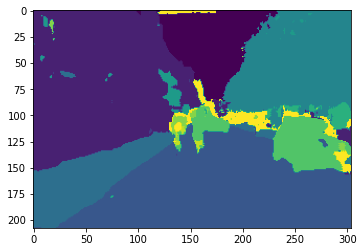

In [ ]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="output.png"
)
import matplotlib.pyplot as plt
plt.imshow(out)


In [ ]:
!python -m keras_segmentation predict_video --checkpoints_path="checkpoints/vgg_unet_1" --input="test.mp4" --output_file="dataset1/test_out.mp4" 

2022-08-18 10:03:30.902566: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
loaded weights  checkpoints/vgg_unet_1.00005
